# Iris Classification Project
## Introduction
This project aims to build a machine learning model that can accurately classify **iris flowers** based on their sepal length, sepal width, petal length, and petal width. The dataset consists of labeled iris samples, where each instance is associated with a specific class: ***setosa***, ***versicolor***, or ***virginica***. The goal is to train and evaluate multiple machine learning models to determine the most effective algorithm for iris classification.

## Workflow:

#### 1. Data Preparation:
Begin by gathering a labeled dataset of iris flowers, including their sepal length, sepal width, petal length, petal width, and class labels. Split the dataset into a training set and a testing set. This division ensures that the trained models can be assessed on unseen data.

#### 2. Feature Scaling:
Normalize or standardize the input features to ensure they are on similar scales. Apply techniques such as min-max scaling or z-score normalization to achieve this.

#### 3. Model Training and Evaluation:
Train and evaluate multiple machine learning models on the training data. Here, we will consider four popular algorithms:
   - **Linear Models:**
      - **Logistic Regression:** Train a logistic regression model using the scikit-learn library. Evaluate its performance on the test data using appropriate metrics such as accuracy, precision, recall, and F1-score.
      - **Support Vector Machines (SVM):** Train an SVM classifier using scikit-learn. Experiment with different kernels (e.g., linear, polynomial, radial basis function) and hyperparameters to optimize the model's performance.
   - **Non-Linear Models:**
      - **Decision Trees:** Train a decision tree classifier and assess its performance on the test data. Experiment with different tree depths or other hyperparameters to optimize the model.
      - **Random Forests:** Train a random forest classifier and evaluate its performance on the test data. Explore different settings for the number of trees and other hyperparameters to find the best configuration.

#### 4. Model Selection:
Based on the evaluation results, select the best-performing model. Consider the accuracy and other metrics to determine which algorithm is most effective for iris classification.

#### 5. Model Fine-tuning:
Once the best model is selected, fine-tune its hyperparameters to optimize its performance further. Techniques like grid search or random search can be applied to explore different hyperparameter combinations.

#### 6. Model Deployment and Prediction:
Deploy the selected and fine-tuned model to make predictions on new, unseen data. Given the sepal length, sepal width, petal length, and petal width of an iris, the trained model can predict its class label (setosa, versicolor, or virginica).

#### 7. Conclusion:
Summarize the project's findings, including the best-performing model and its evaluation metrics. Discuss any insights gained from the classification process and potential applications of the trained model.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# in order to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("iris.csv")
df = pd.DataFrame(data)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# getting rid of unwanted columns -- i.e,Id
df.drop(["Id"], axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape
# The data set contains 150 rows and 5 columns

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# no. of target classes
print(df['Species'].unique())


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
df.isnull().sum()
# data set contains no null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Visualization

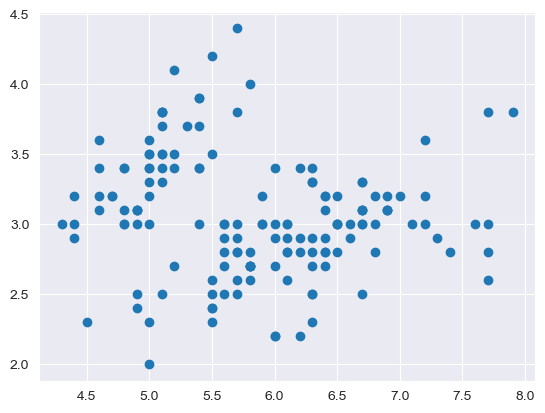

In [9]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.show()

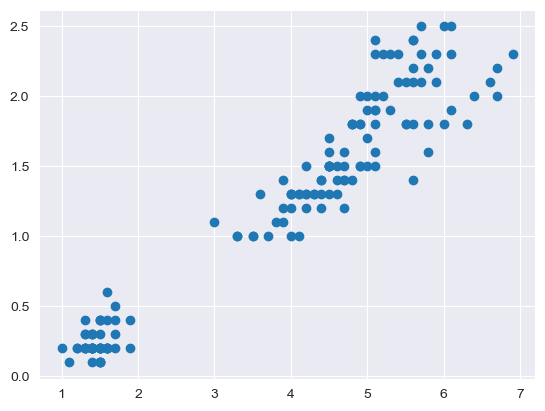

In [10]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])
plt.show()

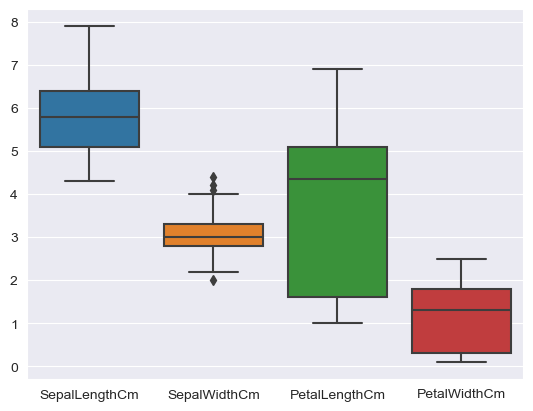

In [11]:
sns.boxplot(data = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
plt.show()

 we can see that 'SepalWidthCm' has outliers

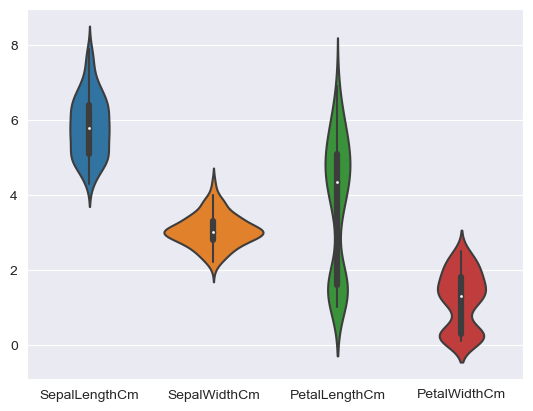

In [12]:
sns.violinplot(data=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

ata = plt.show()

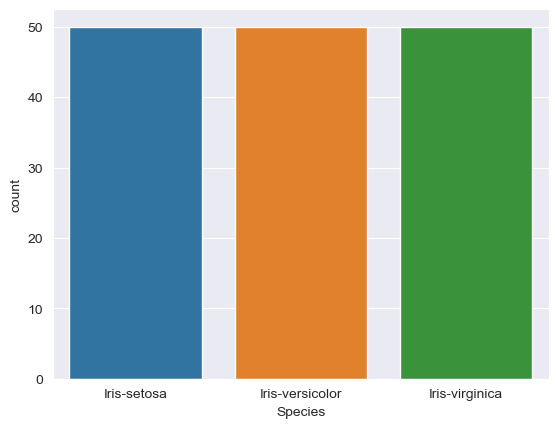

In [13]:
sns.countplot(data["Species"])
plt.show()
# The data set has equal no. of data points for all species. i.e, 50

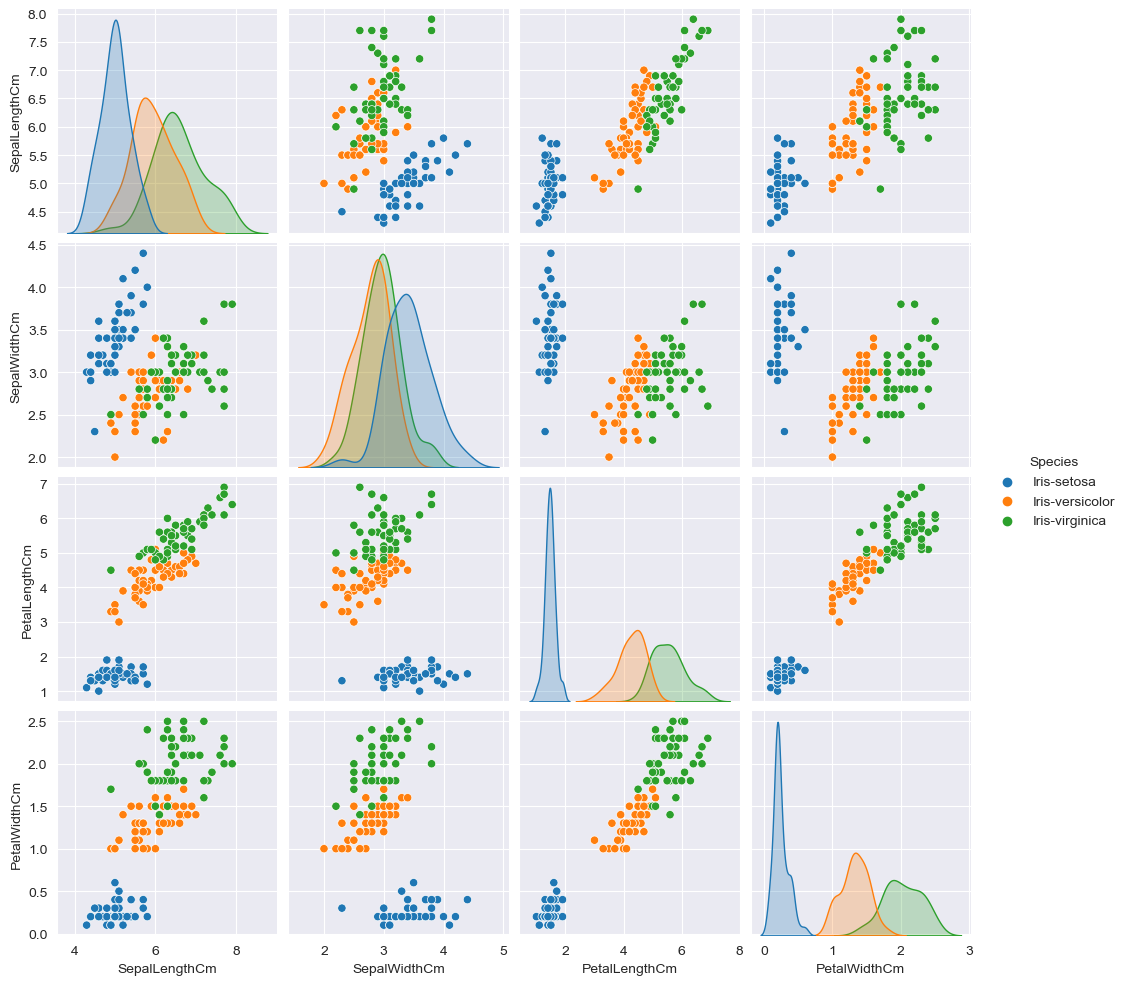

In [14]:
sns.pairplot(df, hue="Species")
plt.show()


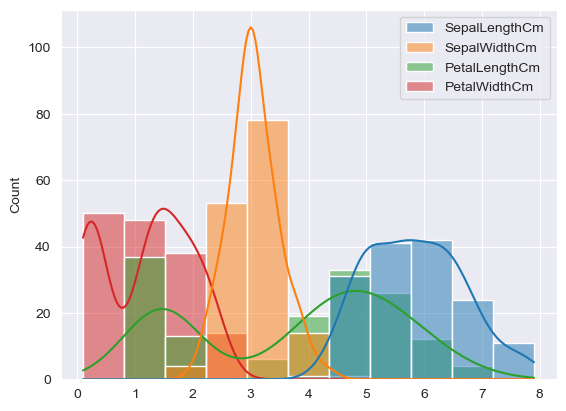

In [15]:
sns.histplot(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],kde = True)

plt.show()

### spliting the data set into training and testing datasets.

In [16]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [18]:
print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape) 

(105, 4)
(105,)
(45, 4)
(45,)


## Importing Models

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
models = { 
    'Logistic_Regression' : LogisticRegression(random_state=42),
    'Support_Vector_Classification' : SVC(kernel='rbf', gamma=0.5, probability=True),
    'Decision_Tree': DecisionTreeClassifier(max_depth=1, random_state=42) ,
    'Random_Forest' : RandomForestClassifier(random_state=42)
} 

In [20]:
# creating a loss function
from sklearn.metrics import accuracy_score, precision_score, recall_score

def loss(y_true, y_pred,returns=False):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  
    recall = recall_score(y_true, y_pred, average='macro') 
    if returns:
        return accuracy, precision, recall
    else:
        print(f' accuracy = {accuracy}\n precision = {precision}\n recall = {recall}')


In [21]:
# training the models
def train_and_evaluate(models, X, y):
    for name, model in models.items():
        print(name, ':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('*' * 30)
        


In [22]:
train_and_evaluate(models, X_train, y_train)

Logistic_Regression :
 accuracy = 0.9619047619047619
 precision = 0.964835164835165
 recall = 0.963963963963964
******************************
Support_Vector_Classification :
 accuracy = 0.9904761904761905
 precision = 0.9912280701754387
 recall = 0.990990990990991
******************************
Decision_Tree :
 accuracy = 0.6476190476190476
 precision = 0.5
 recall = 0.6666666666666666
******************************
Random_Forest :
 accuracy = 1.0
 precision = 1.0
 recall = 1.0
******************************


#### Based on the results
- both ***Logistic Regression*** and ***Support Vector Classification** models perform well, with high accuracy, precision, and recall scores.
- The ***Decision Tree model*** shows lower performance compared to the other models
- while the ***Random Forest model*** achieves perfect accuracy, precision, and recall scores, ***which indicates overfitting***
- based on the accuracy_scores, we choose to use ***Support Vector Classification** model further in this project

In [23]:
svc = SVC(kernel='rbf', gamma=0.5, probability=True)
svc.fit(X_train, y_train)


SVC(gamma=0.5, probability=True)

In [24]:
y_pred = svc.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [26]:
print(classification_report(y_test, y_pred, target_names=df['Species'].unique()))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [27]:
import joblib 
joblib.dump(svc, 'model.pkl') 
svc = joblib.load('model.pkl')

# Conclusion:

- The ***Support Vector Classification model*** demonstrated superior performance compared to the other models, achieving an accuracy score of 0.99. Its precision and recall scores for all iris species were also high, indicating that it was able to correctly classify the different species with minimal misclassifications.
- The evaluation metrics were further supported by the **confusion matrix** and **classification report**, which confirmed the model's excellent performance.
- As such, we can confidently conclude that the **SVC** model is the **most suitable choice for iris classification in this project.**